In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
twitter_df=pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv')

C:\Users\I. OGHENEMARHO\AppData\Local\Temp\ipykernel_8484\3232179781.py:1: DtypeWarning: Columns (32,33,41,53,61,78,146) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_df=pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv')


In [3]:
twitter_df.shape

(8529, 147)

In [4]:
#check duplicates
if twitter_df.duplicated().any():
    print('There are duplicates in dataframe.')
else:
    print('There are no duplicates in the Dataframe')
    

There are no duplicates in the Dataframe


In [6]:
#find missing column values
twitter_df.isnull().sum()/len(twitter_df)*100


Date                         0.000000
Post ID                      0.000000
Network                      0.000000
Post Type                    0.000000
Content Type                 0.000000
                              ...    
Card Impressions           100.000000
Card Teaser Impressions    100.000000
Card Teaser Clicks         100.000000
Poll Votes                 100.000000
Tags                        83.585414
Length: 147, dtype: float64

In [7]:
threshold =0.8 * len(twitter_df)
empty_column=twitter_df.columns[twitter_df.isnull().sum()>threshold]
twitter_df.drop(empty_column,axis=1,inplace=True)

In [8]:
twitter_df.shape

(8529, 34)

In [10]:
twitter_df.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Linked Content', 'Impressions',
       'Organic Impressions', 'Potential Reach',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Other Post Clicks', 'Post Clicks (All)', 'Post Media Clicks',
       'Post Hashtag Clicks', 'Post Detail Expand Clicks', 'Profile Clicks',
       'Other Engagements', 'App Engagements', 'App Install Attempts',
       'App Opens', 'Follows from Post', 'Unfollows from Post', 'Media Views'],
      dtype='object')

In [11]:
#find missing column values
twitter_df.isnull().sum()/len(twitter_df)*100


Date                                 0.000000
Post ID                              0.000000
Network                              0.000000
Post Type                            0.000000
Content Type                         0.000000
Profile                              0.000000
Sent by                              0.000000
Link                                 0.562786
Post                                 0.000000
Linked Content                      41.634424
Impressions                          8.054872
Organic Impressions                  8.054872
Potential Reach                      0.937976
Engagement Rate (per Impression)     8.066596
Engagements                          8.054872
Reactions                            8.054872
Likes                                8.054872
Comments                             8.054872
Shares                               8.054872
Click-Through Rate                  57.638645
Post Link Clicks                    57.638645
Other Post Clicks                 

In [15]:
#create a new set of the data we need for the analysis

column=['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Impressions', 'Organic Impressions',
       'Potential Reach', 'Profile Clicks', 'Engagement Rate (per Impression)',
       'Shares', 'Engagements', 'Reactions', 'Likes',
       'Comments']

twt_new= twitter_df[column].copy()

In [16]:
twt_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              8529 non-null   object 
 1   Post ID                           8529 non-null   int64  
 2   Network                           8529 non-null   object 
 3   Post Type                         8529 non-null   object 
 4   Content Type                      8529 non-null   object 
 5   Profile                           8529 non-null   object 
 6   Sent by                           8529 non-null   object 
 7   Link                              8481 non-null   object 
 8   Post                              8529 non-null   object 
 9   Impressions                       7842 non-null   object 
 10  Organic Impressions               7842 non-null   object 
 11  Potential Reach                   8449 non-null   object 
 12  Profil

In [17]:
# Create an empty dictionary to store the type value counts for each column
type_counts = {}

# Iterate through each column in the DataFrame
for column in twt_new.columns:
    # Apply the 'type' function to each element in the column and get the value counts
    column_type_counts = twt_new[column].apply(type).value_counts()
    
    # Store the result in the dictionary with the column name as the key
    type_counts[column] = column_type_counts

# Print the type value counts for each column
for column, counts in type_counts.items():
    print(f"Column: {column}")
    print(counts)
    print()

Column: Date
<class 'str'>    8529
Name: Date, dtype: int64

Column: Post ID
<class 'int'>    8529
Name: Post ID, dtype: int64

Column: Network
<class 'str'>    8529
Name: Network, dtype: int64

Column: Post Type
<class 'str'>    8529
Name: Post Type, dtype: int64

Column: Content Type
<class 'str'>    8529
Name: Content Type, dtype: int64

Column: Profile
<class 'str'>    8529
Name: Profile, dtype: int64

Column: Sent by
<class 'str'>    8529
Name: Sent by, dtype: int64

Column: Link
<class 'str'>      8481
<class 'float'>      48
Name: Link, dtype: int64

Column: Post
<class 'str'>    8529
Name: Post, dtype: int64

Column: Impressions
<class 'str'>      7842
<class 'float'>     687
Name: Impressions, dtype: int64

Column: Organic Impressions
<class 'str'>      7842
<class 'float'>     687
Name: Organic Impressions, dtype: int64

Column: Potential Reach
<class 'str'>      8449
<class 'float'>      80
Name: Potential Reach, dtype: int64

Column: Profile Clicks
<class 'float'>    8529
N

In [18]:
def clean_and_convert_to_float(x):
    # If the value is a string, clean it and try to convert it to float
    if isinstance(x, str):
        # Remove single quotes and commas
        x = x.replace("'", '').replace(',', '')
        
        # Remove non-alphanumeric characters and spaces using a Pandas Series method
        x = pd.Series(x).str.replace(r'[^A-Za-z0-9\s.]+', '', regex=True).iloc[0]
        
        # Try to convert to float, and handle potential exceptions
        try:
            return float(x)
        except ValueError:
            return None  # or any other default value
    return x

In [19]:
column_to_convert=['Impressions', 'Organic Impressions',
       'Potential Reach', 'Engagement Rate (per Impression)',
       'Shares', 'Engagements', 'Reactions', 'Likes',
       'Comments']


In [20]:
twt_new[column_to_convert] = twt_new[column_to_convert].applymap(clean_and_convert_to_float)

In [21]:
na_column=['Impressions', 'Organic Impressions',
       'Potential Reach', 'Engagement Rate (per Impression)',
       'Shares', 'Engagements', 'Reactions', 'Likes',
       'Comments']

column_mean=twt_new[na_column].mean()

twt_new[na_column]=twt_new[na_column].fillna(column_mean)

In [22]:
twt_new['Date'] = pd.to_datetime(twt_new['Date'])

In [23]:
twt_new['Hour']=twt_new['Date'].apply(lambda time: time.hour)
twt_new['Month']=twt_new['Date'].apply(lambda time: time.month) #month the post
twt_new['Day of week']=twt_new['Date'].apply(lambda time: time.dayofweek)#Day of week the post

In [24]:
datemap = {0:'Mon', 1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
twt_new['Day of week'] = twt_new['Day of week'].map(datemap)

In [25]:
twt_new['Content Type'].unique()

array(['Photo', 'Text', 'Video', 'Link'], dtype=object)

In [26]:
twt_new['Content Type'].value_counts()

Photo    6213
Text     1018
Video     883
Link      415
Name: Content Type, dtype: int64

In [31]:
twitter_engagement_summary = (twt_new.groupby('Content Type').agg({'Impressions':'mean', 'Organic Impressions':'mean',
       'Potential Reach':'mean', 'Engagement Rate (per Impression)':'mean',
       'Shares':'mean', 'Engagements':'mean', 'Reactions':'mean', 'Likes':'mean',
       'Comments':'mean'}).sort_values(by ='Engagements', ascending = False))

twitter_engagement_summary.columns = [['Avg Impressions', 'Avg Organic Impressions',
       'Avg Potential Reach', 'Avg Engagement Rate (per Impression)',
       'Avg Shares', 'Avg Engagements', 'Avg Reactions', 'Avg Likes',
       'Avg Comments']]



In [32]:
twitter_engagement_summary

,Avg Impressions,Avg Organic Impressions,Avg Potential Reach,Avg Engagement Rate (per Impression),Avg Shares,Avg Engagements,Avg Reactions,Avg Likes,Avg Comments
Content Type,,,,,,,,,
Photo,3364.311023,3364.311023,285369.864631,2.978471,8.696456,118.431425,21.512279,21.512279,6.640459
Video,2997.285725,2997.285725,322757.402493,3.632602,8.572269,108.868309,27.839694,27.839694,6.557959
Text,2691.041664,2691.041664,232705.363087,2.110557,6.143128,78.420053,9.887290,9.887290,5.071979
Link,2187.165417,2187.165417,237919.621820,2.310862,7.433610,65.161119,9.804506,9.804506,2.535344


In [33]:
value_counts = twt_new['Content Type'].value_counts()
total_count = len(twt_new['Content Type'])
percentage_distribution = (value_counts / total_count) * 100

# Print the percentage distribution
print(percentage_distribution)

Photo    72.845586
Text     11.935749
Video    10.352914
Link      4.865752
Name: Content Type, dtype: float64


In [35]:
twitter_engagement_days = (twt_new.groupby('Day of week').agg({'Impressions':'mean', 'Organic Impressions':'mean',
       'Potential Reach':'mean', 'Engagement Rate (per Impression)':'mean',
       'Shares':'mean', 'Engagements':'mean', 'Reactions':'mean', 'Likes':'mean',
       'Comments':'mean'}).sort_values(by ='Engagements', ascending = False))

twitter_engagement_days.columns = [['Avg Impressions', 'Avg Organic Impressions',
       'Avg Potential Reach', 'Avg Engagement Rate (per Impression)',
       'Avg Shares', 'Avg Engagements', 'Avg Reactions', 'Avg Likes',
       'Avg Comments']]

twitter_engagement_days

,Avg Impressions,Avg Organic Impressions,Avg Potential Reach,Avg Engagement Rate (per Impression),Avg Shares,Avg Engagements,Avg Reactions,Avg Likes,Avg Comments
Day of week,,,,,,,,,
Wed,3494.213541,3494.213541,281418.591464,3.203091,9.775991,127.129407,20.590152,20.590152,6.500752
Sun,3319.547134,3319.547134,301556.336360,3.059026,7.252339,121.895302,23.403191,23.403191,8.361813
Mon,3168.776644,3168.776644,279325.219606,2.900653,9.797449,120.109271,28.877078,28.877078,5.849647
Thu,3238.075679,3238.075679,275836.116588,2.676655,7.643755,105.615936,18.190779,18.190779,6.556483
Tue,3066.193847,3066.193847,277175.937679,2.814290,8.078714,104.388915,16.822305,16.822305,6.031847
Sat,3009.455934,3009.455934,284297.304390,2.936549,7.893897,102.026652,19.062842,19.062842,5.923272
Fri,3074.084585,3074.084585,276828.809047,2.876650,7.421593,96.886755,17.079623,17.079623,5.575442


In [36]:
hourly_engagement = twt_new.groupby('Hour')['Engagement Rate (per Impression)'].mean()
daily_engagement = twt_new.groupby('Day of week')['Engagement Rate (per Impression)'].mean()


Text(0, 0.5, 'Average Engagement Rate')

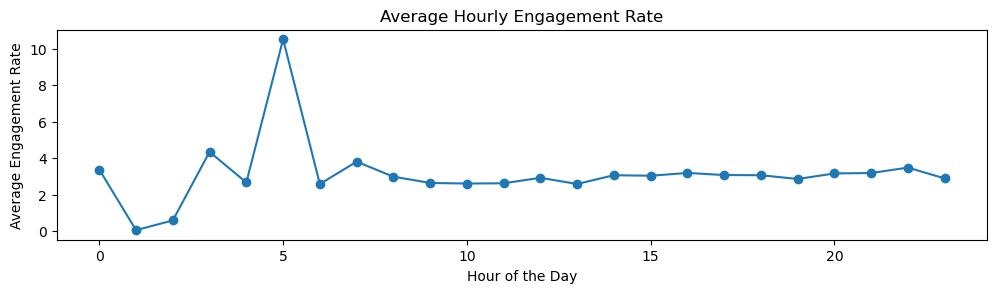

In [37]:
# Peak hours of the day
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
hourly_engagement.plot(kind='line', marker='o')
plt.title('Average Hourly Engagement Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement Rate')

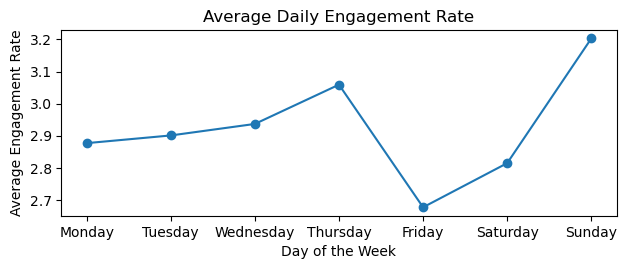

In [38]:
# Peak days of the week
plt.subplot(2, 1, 2)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_engagement.index = days
daily_engagement.plot(kind='line', marker='o')
plt.title('Average Daily Engagement Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Average Engagement Rate')

plt.tight_layout()
plt.show()

In [39]:
hourly_Impression = twt_new.groupby('Hour')['Impressions'].mean()
daily_Impression = twt_new.groupby('Day of week')['Impressions'].mean()

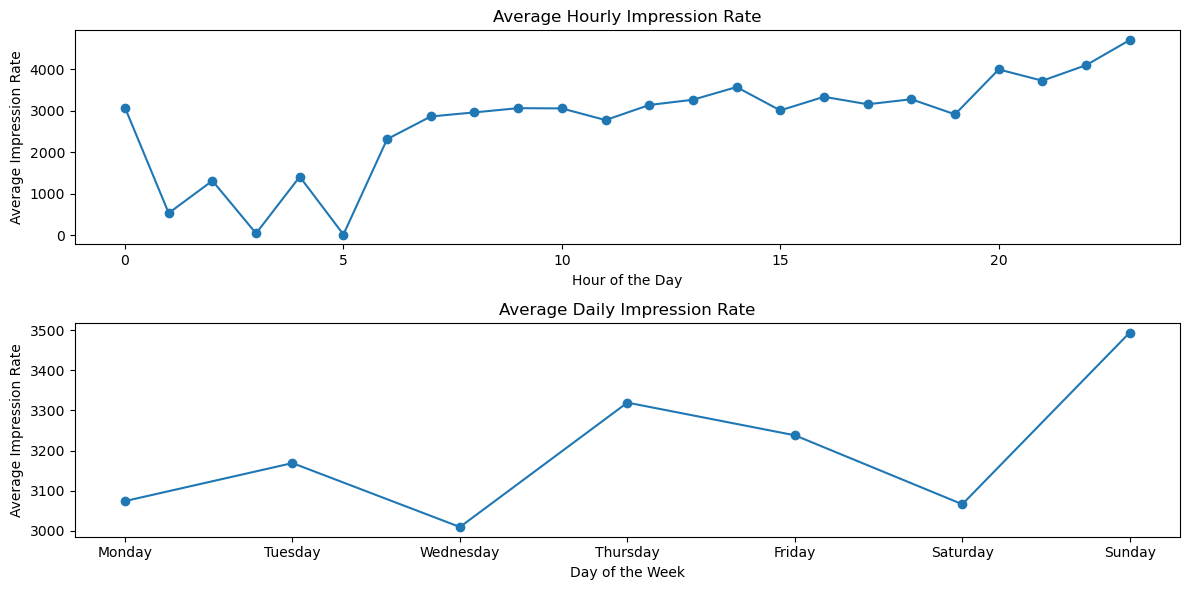

In [40]:
# Peak hours of the day
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
hourly_Impression.plot(kind='line', marker='o')
plt.title('Average Hourly Impression Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Impression Rate')

# Peak days of the week
plt.subplot(2, 1, 2)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_Impression.index = days
daily_Impression.plot(kind='line', marker='o')
plt.title('Average Daily Impression Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Average Impression Rate')

plt.tight_layout()
plt.show()